<a href="https://colab.research.google.com/github/saiku122/AIJobcolle/blob/master/DeepLearning/%E8%AC%9B%E7%BE%A9%E3%82%B3%E3%83%BC%E3%83%89%E6%A8%A1%E5%86%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/bac

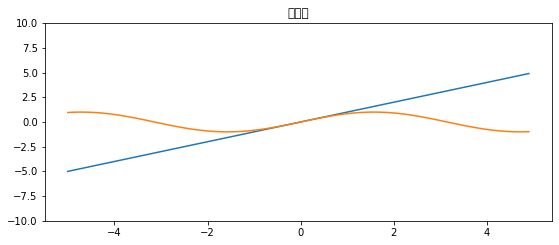

In [13]:
n_cols=2
n_rows=2

plt.figure(figsize=(20,8))

x=np.arange(-5,5,0.1)

y1=x
plt.subplot(n_rows,n_cols,1)
plt.title('x')
plt.ylim(-10,10);
plt.plot(x,y1)

y2=np.sin(x)
plt.subplot(n_rows,n_cols,1)
plt.title('グラフ')
plt.ylim(-10,10);
plt.plot(x,y2)
plt.show()